## Brandon Swatek - zadanie numeryczne nr 4

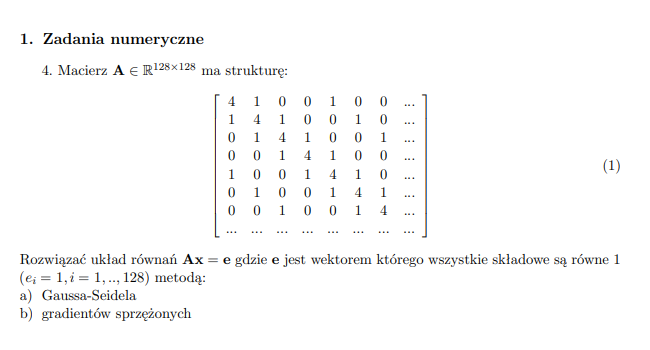

Podpunkt a) rozwiązuje z pomocą funkcji realizującej algorytm Gaussa-Seidela, znajdującej się poniżej

In [1]:
import numpy as np


def gauss_seidel(matrix_a, vector_x, vector_b, iterations):
    n = len(matrix_a)
    for k in range(iterations):
        for i in range(n):
            temp = vector_b[i]
            for j in range(n):
                if i != j:
                    temp -= matrix_a[i][j] * vector_x[j]
            vector_x[i] = temp / matrix_a[i][i]
    return vector_x

Złożoność obliczeniowa Metody Gaussa-Seidela wynosi $O(kN)$ gdzie N to wymiar wektora x, a k to liczba iteracji.
Mamy do czynienia z taką złożonością, ponieważ w każdej iteracji algorytmu mamy liczone N elementów wektora x.

In [2]:
def conjugate_gradients(matrix_a, vector_x, vector_b, iterations):
    r = vector_b - np.dot(matrix_a, vector_x)
    p = r
    rsold = np.dot(r.T, r)
    for k in range(iterations):
        Ap = np.dot(matrix_a, p)
        alpha = rsold / np.dot(np.transpose(p), Ap)
        vector_x = vector_x + np.dot(alpha, p)
        r = r - np.dot(alpha, Ap)
        rsnew = np.dot(np.transpose(r), r)
        p = r + (rsnew / rsold) * p
        rsold = rsnew
    return vector_x

Podpunkt b) rozwiązuje z wykorzystaniem Metody Gradientów Sprzężonych przedstawionej powyżej.
Metoda ma złożoność $O(kN^{2})$, jednak przy stosowanie tej metody należy pamiętać, że chcociaż ma wyższą złożoność niż alternatywna Metoda Gaussa-Seidela, to przy jej użyciu do uzyskania satysfakcjonującej dokładności będziemy potrzebować mniej iteracji (mniejsze k).

Obydwie metody są metodami iteracyjnymi, co oznacza że, hipotetycznie, dla nieskończonej ilości iteracji otrzymamy dokładne wyniki. W praktyce niewielka ilość iteracji (w porównaniu z choćby wymiarami macierzy) zwróci wyniki z satysfakcjonującą nas dokładnością, tzn. poniżej błędu zaokrąglenia. Wykorzystane metody są efektywne obliczeniowo dla macierzy rzadkich, z uwzględnieniem struktury tych macierzy.

# Realizacja

In [3]:
def create_a(n):
    matrix_a = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix_a[i][j] = 4
            if (i - j) == 1 or (j - i) == 1 or (j - i) == 4 or (i - j) == 4:
                matrix_a[i][j] = 1
    return matrix_a

dim = 128
e = np.ones(dim)
x = np.zeros(dim)
a = create_a(dim)

print("Wektor rozwiązań x dla metody a), 40 iteracji\n", gauss_seidel(a, x, e, 40))
x = np.zeros(dim)

Wektor rozwiązań x dla metody a), 40 iteracji
 [0.1942768  0.1309302  0.14679491 0.16231132 0.09196261 0.13520749
 0.11957885 0.1119972  0.14035395 0.11669838 0.12768499 0.12976705
 0.11792601 0.12996004 0.12321575 0.12332361 0.12821492 0.12231972
 0.12616837 0.12550783 0.12357098 0.12637777 0.12428321 0.12490571
 0.12561556 0.12431502 0.12541532 0.12497054 0.12474605 0.12533125
 0.12476995 0.12505074 0.12509842 0.12484398 0.12512291 0.12495814
 0.12496553 0.12507148 0.12493631 0.12502825 0.12500981 0.12496824
 0.12503212 0.12498275 0.12499873 0.1250136  0.1249842  0.12500988
 0.12499892 0.12499443 0.12500758 0.12499462 0.12500129 0.12500218
 0.12499645 0.12500278 0.12499912 0.12499913 0.12500163 0.12499872
 0.12500031 0.12500055 0.12499921 0.12500036 0.12500035 0.1249992
 0.12500057 0.12500029 0.12499872 0.12500167 0.12499906 0.12499917
 0.12500279 0.12499638 0.12500227 0.12500124 0.12499459 0.12500768
 0.12499431 0.12499899 0.12500991 0.12498408 0.12501374 0.12499865
 0.12498272 0.12

In [4]:
print("Wektor rozwiązań x dla metody b), 20 iteracji\n", conjugate_gradients(a, x, e, 20))

Wektor rozwiązań x dla metody b), 20 iteracji
 [0.1942768  0.13093019 0.14679491 0.16231133 0.09196263 0.1352075
 0.11957886 0.11199719 0.1403539  0.11669837 0.12768499 0.12976705
 0.11792609 0.12996007 0.12321576 0.12332356 0.12821484 0.12231965
 0.1261684  0.12550787 0.1235711  0.12637782 0.12428328 0.12490559
 0.12561543 0.12431498 0.12541533 0.12497056 0.12474611 0.1253313
 0.12476997 0.12505084 0.12509839 0.12484401 0.12512268 0.12495811
 0.1249654  0.12507154 0.12493644 0.12502826 0.12500994 0.12496841
 0.1250321  0.12498266 0.1249989  0.12501318 0.12498429 0.12500958
 0.12499897 0.12499454 0.12500705 0.12499568 0.12500063 0.12500236
 0.12499754 0.12500156 0.1250001  0.12499928 0.12500071 0.12499966
 0.12499984 0.12500008 0.1249997  0.1249999  0.1249999  0.1249997
 0.12500008 0.12499984 0.12499966 0.12500071 0.12499928 0.1250001
 0.12500156 0.12499754 0.12500236 0.12500063 0.12499568 0.12500705
 0.12499454 0.12499897 0.12500958 0.12498429 0.12501318 0.1249989
 0.12498266 0.125032